<a href="https://colab.research.google.com/github/ShreePurvaja/Data-Science-Notes/blob/main/HeartDisease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Dataset & model

In [2]:
import pandas as pd
dia = pd.read_csv('/heart.csv')
display(dia)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


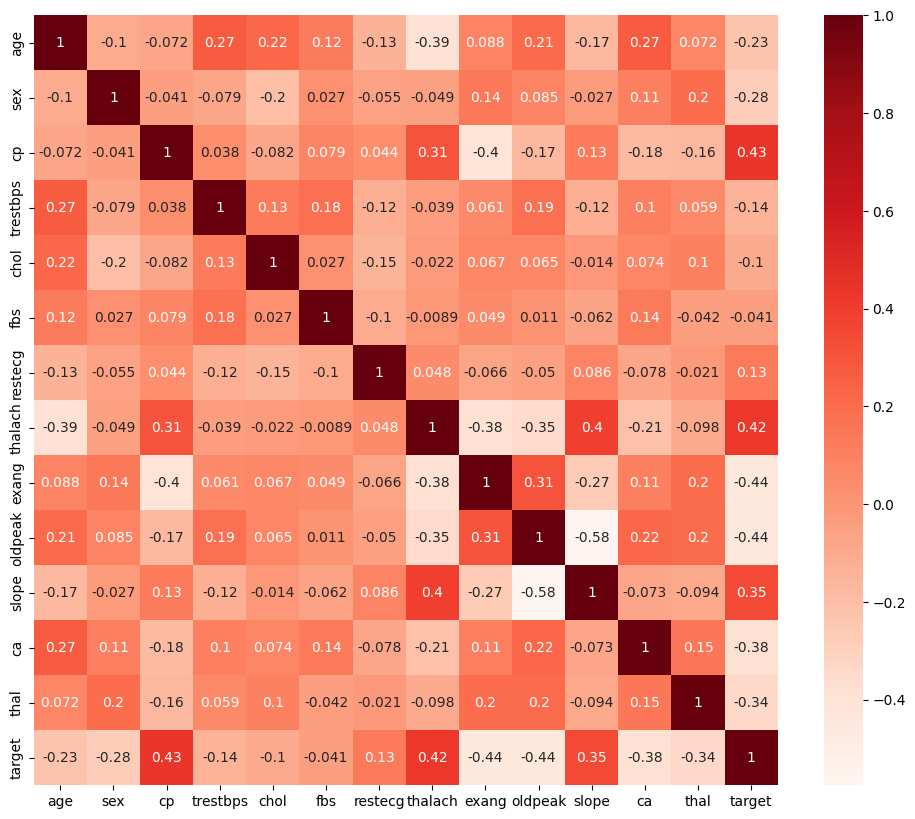

In [6]:
# prompt: correlation heatmap for dia

import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,10))
cor = dia.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()


In [14]:
#cp,thalach,slope - features
#heartdisease - target
x=dia[['cp','thalach','slope']]
y=dia[['target']]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
print(model.coef_) #m value
print(model.intercept_) #c value
print(model.predict([[0,164,0]]))

[[0.15948689 0.00558739 0.16275706]]
[-0.69660445]
[[0.219727]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [15]:
model.predict(x_test)
print(model.score(x_test,y_test))
from sklearn.metrics import r2_score
r2_score(y_test,model.predict(x_test))
print(r2_score(y_test,model.predict(x_test)))
print("\n")
print(x_test,model.predict(x_test))

0.2997320965414022
0.2997320965414022


     cp  thalach  slope
527   0      163      2
359   2      115      2
447   0      145      1
31    1      162      2
621   0      150      2
..   ..      ...    ...
832   2      151      2
796   1      132      1
644   2      169      2
404   0      138      2
842   2      165      1

[205 rows x 3 columns] [[ 0.53965373]
 [ 0.59043294]
 [ 0.27632371]
 [ 0.69355323]
 [ 0.4670177 ]
 [ 0.46447037]
 [-0.16021531]
 [ 0.18692552]
 [ 0.92567616]
 [ 0.00181891]
 [ 0.84186535]
 [ 0.08562971]
 [ 0.69355323]
 [ 0.91450138]
 [ 0.05282823]
 [ 0.59784482]
 [ 0.24838677]
 [ 0.80530097]
 [ 0.85304013]
 [ 0.17016336]
 [ 0.51730418]
 [ 0.43349338]
 [ 0.5196214 ]
 [ 0.13663903]
 [ 0.51730418]
 [ 0.91450138]
 [ 0.72453023]
 [ 0.89215183]
 [ 0.32661019]
 [ 0.57317805]
 [ 0.53383624]
 [ 0.74129239]
 [ 0.40156344]
 [ 0.59043294]
 [ 0.62346453]
 [ 0.69914062]
 [ 0.51730418]
 [ 0.30984803]
 [ 0.16457597]
 [ 0.73825233]
 [ 0.18692552]
 [ 0.17016336]
 [ 0.41114383]
 [ 

In [20]:

import pickle       #use it to save trained models so they can be reused later without retraining.

# Save the model to a file
filename = 'heart_model.pkl'
pickle.dump(model, open(filename, 'wb'))

# Load the model from the file
loaded_model = pickle.load(open(filename, 'rb'))

# Use the loaded model to make predictions
# Example:
new_data = [[3, 180, 2]]  # Example input features
predictions = loaded_model.predict(new_data)
print("Predictions using loaded model:", predictions)

Predictions using loaded model: [[1.11309998]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [23]:
# Install Gradio if not already installed
!pip install gradio
import gradio as gr
import pickle as pkl
import numpy as np

# Load the trained model
model = pkl.load(open('heart_model.pkl', 'rb'))

# Define prediction function
def predict_heart_disease(cp, thalach, slope):
    input_data = np.array([[cp, thalach, slope]])
    prediction = model.predict(input_data)[0]

    if prediction < 0.4:
        return "✅ Result: No Heart Disease"
    elif prediction < 0.7:
        return "⚠️ Result: Mild Heart Disease Detected"
    else:
        return "❗ Result: Severe Heart Disease Detected"

# Create the Gradio Interface
iface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Chest Pain Type (cp: 0-3)"),
        gr.Number(label="Max Heart Rate (thalach: 70-202 bpm)"),
        gr.Number(label="Slope Type (slope: 0-2)")
    ],
    outputs=gr.Textbox(label="Prediction"),
    title="Heart Disease Predictor",
    description="Enter patient features to check heart disease risk"
)

# Launch the app
iface.launch()


Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://9b04ee3bd735f748c1.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
